# Phytoplankton productivity

In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import xarray as xr

from dask.distributed import Client

import catalog
import util

xr.set_options(keep_attrs=True)

In [13]:
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import pop_tools

In [14]:
ds_grid = pop_tools.get_grid('POP_gx1v7')
lons=ds_grid.TLONG
lats=ds_grid.TLAT

### Parameters

In [19]:
casename = 'g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.4p2z.001'
component = 'pop'
stream = 'h'

cluster_scheduler_address = None

In [20]:
assert component in ['pop']
assert stream in ['h', 'h.ecosys.nday1']

### Connect to cluster

In [21]:
if cluster_scheduler_address is None:
    cluster, client = util.get_ClusterClient()
    cluster.scale(12)
else:
    client = Client(cluster_scheduler_address)
client

/glade/work/kristenk/miniconda/envs/cesm-exp/lib/python3.7/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 35770 instead
  f"Port {expected} is already in use.\n"


<Client: 'tcp://10.12.206.60:33048' processes=0 threads=0, memory=0 B>

### Load the data

In [22]:
dsets = catalog.to_dataset_dict(
    case=casename,
    component=component,
    stream=stream,
)
dsets.keys()

getting assets
got assets
got cdf kwargs {'coords': 'minimal', 'combine': 'by_coords', 'compat': 'override', 'preprocess': <function _preprocess_pop at 0x2af8f9bd8f80>, 'decode_times': False}


dict_keys(['g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.4p2z.001.pop.h'])

In [23]:
ds = dsets[f'{casename}.{component}.{stream}']
ds

<xarray.Dataset>
Dimensions:                           (time: 120, d2: 2, moc_comp: 3, transport_comp: 5, transport_reg: 2, z_t: 60, z_t_150m: 15, z_w: 60, z_w_top: 60, z_w_bot: 60, lat_aux_grid: 395, moc_z: 61, nlat: 384, nlon: 320)
Coordinates: (12/16)
    transport_components              (transport_comp) |S384 dask.array<chunksize=(5,), meta=np.ndarray>
    transport_regions                 (transport_reg) |S384 dask.array<chunksize=(2,), meta=np.ndarray>
  * time                              (time) object 0296-01-16 12:00:00 ... 0...
  * z_t                               (z_t) float32 500.0 1.5e+03 ... 5.375e+05
  * z_t_150m                          (z_t_150m) float32 500.0 ... 1.45e+04
  * z_w                               (z_w) float32 0.0 1e+03 ... 5e+05 5.25e+05
    ...                                ...
    ULONG                             (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT                              (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG                             (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT                              (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    KMT                               (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TAREA                             (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: d2, moc_comp, transport_comp, transport_reg, nlat, nlon
Data variables: (12/549)
    time_bound                        (time, d2) float64 dask.array<chunksize=(1, 2), meta=np.ndarray>
    moc_components                    (time, moc_comp) |S384 dask.array<chunksize=(1, 3), meta=np.ndarray>
    dz                                (time, z_t) float32 dask.array<chunksize=(1, 60), meta=np.ndarray>
    dzw                               (time, z_w) float32 dask.array<chunksize=(1, 60), meta=np.ndarray>
    KMU                               (time, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    REGION_MASK                       (time, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    ...                                ...
    XBLT                              (time, nlat, nlon) float32 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    TBLT                              (time, nlat, nlon) float32 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    BSF                               (time, nlat, nlon) float32 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    MOC                               (time, transport_reg, moc_comp, moc_z, lat_aux_grid) float32 dask.array<chunksize=(1, 2, 3, 61, 395), meta=np.ndarray>
    N_HEAT                            (time, transport_reg, transport_comp, lat_aux_grid) float32 dask.array<chunksize=(1, 2, 5, 395), meta=np.ndarray>
    N_SALT                            (time, transport_reg, transport_comp, lat_aux_grid) float32 dask.array<chunksize=(1, 2, 5, 395), meta=np.ndarray>
Attributes:
    title:             g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.4p2z.001
    history:           none
    Conventions:       CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-cu...
    time_period_freq:  month_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    contents:          Diagnostic and Prognostic Variables
    source:            CCSM POP2, the CCSM Ocean Component
    revision:          $Id$
    calendar:          All years have exactly  365 days.
    start_time:        This dataset was created on 2022-06-19 at 10:02:00.0
    cell_methods:      cell_methods = time: mean ==> the variable values are ...

### Variable list

In [24]:
variables =['photoC_TOT_zint',
            'photoC_sp_zint','photoC_diat_zint',
            'photoC_diaz_zint','photoC_cocco_zint']

In [25]:
keep_vars=['z_t','z_t_150m','dz','time_bound','TAREA','TLAT','TLONG'] + variables
ds = ds.drop([v for v in ds.variables if v not in keep_vars])

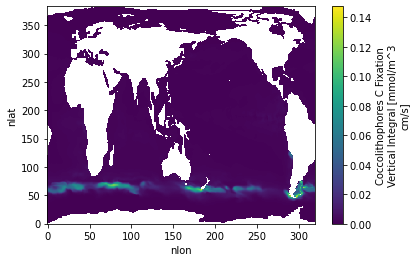

In [26]:
ds.photoC_cocco_zint.isel(time=0).plot()

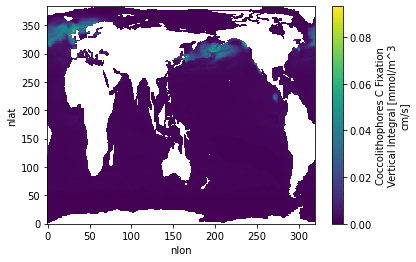

In [27]:
ds.photoC_cocco_zint.isel(time=6).plot()

In [28]:
dt_wgt = ds.time_bound.diff('d2').squeeze()
dt_wgt /= dt_wgt.sum()
#dt_wgt

In [29]:
ds = ds.weighted(dt_wgt).mean('time')

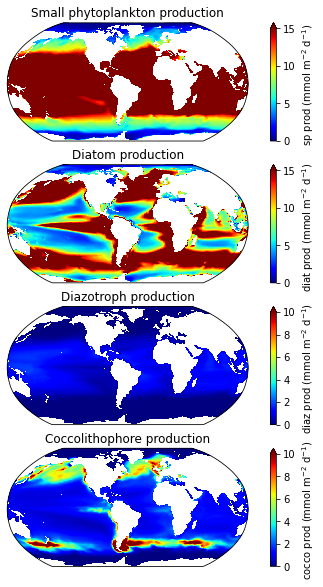

In [30]:
fig = plt.figure(figsize=(8,10))

ax = fig.add_subplot(4,1,1, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('Small phytoplankton production', fontsize=12)
lon, lat, field = util.adjust_pop_grid(lons, lats, ds.photoC_sp_zint * 864.)
pc=ax.pcolormesh(lon, lat, field, cmap='jet',vmin=0,vmax=15,transform=ccrs.PlateCarree())

cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='sp prod (mmol m$^{-2}$ d$^{-1}$)')

ax = fig.add_subplot(4,1,2, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('Diatom production', fontsize=12)
lon, lat, field = util.adjust_pop_grid(lons, lats, ds.photoC_diat_zint * 864.)
pc=ax.pcolormesh(lon, lat, field, cmap='jet',vmin=0,vmax=15,transform=ccrs.PlateCarree())

cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='diat prod (mmol m$^{-2}$ d$^{-1}$)')

ax = fig.add_subplot(4,1,3, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('Diazotroph production', fontsize=12)
lon, lat, field = util.adjust_pop_grid(lons, lats, ds.photoC_diaz_zint * 864.)
pc=ax.pcolormesh(lon, lat, field, cmap='jet',vmin=0,vmax=10,transform=ccrs.PlateCarree())

cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='diaz prod (mmol m$^{-2}$ d$^{-1}$)')

ax = fig.add_subplot(4,1,4, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('Coccolithophore production', fontsize=12)
lon, lat, field = util.adjust_pop_grid(lons, lats, ds.photoC_cocco_zint * 864.)
pc=ax.pcolormesh(lon, lat, field, cmap='jet',vmin=0,vmax=10,transform=ccrs.PlateCarree())

cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='cocco prod (mmol m$^{-2}$ d$^{-1}$)');

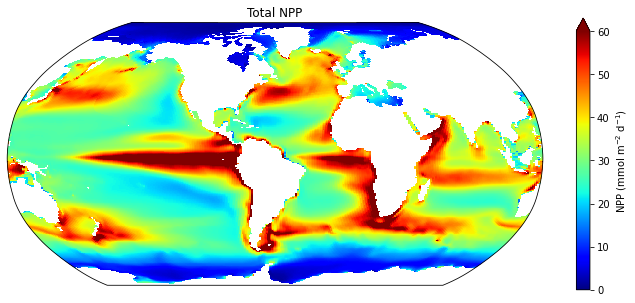

In [31]:
fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(1,1,1, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('Total NPP', fontsize=12)
lon, lat, field = util.adjust_pop_grid(lons, lats,  ds.photoC_TOT_zint*864.)
pc=ax.pcolormesh(lon, lat, field, cmap='jet',vmin=0,vmax=60,transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='NPP (mmol m$^{-2}$ d$^{-1}$)');

### Globally integrated NPP

In [32]:
ds_glb = util.global_mean(ds, ds_grid, variables,normalize=False).compute()

nmols_to_PgCyr = 1e-9 * 12. * 1e-15 * 365. * 86400.

for v in variables:
    ds_glb[v] = ds_glb[v] * nmols_to_PgCyr        
    ds_glb[v].attrs['units'] = 'Pg C yr$^{-1}$'
    
ds_glb

<xarray.Dataset>
Dimensions:            ()
Data variables:
    photoC_TOT_zint    float64 52.19
    photoC_sp_zint     float64 27.47
    photoC_diat_zint   float64 20.58
    photoC_diaz_zint   float64 1.016
    photoC_cocco_zint  float64 3.111

### **TO DO**

• make climatologies and plot map for each month

• Compare global NPP map to satellite-derived NPP (CbPM, VGPM, Eppley-VGPM)